# u2001820 Powerlifting Project: Correlations
---
We aim to investigate the powerlifting dataset available on <a href="https://www.kaggle.com/datasets/open-powerlifting/powerlifting-database">Kaggle</a>.

This notebook is dedicated to exploring the correlations between variables.

### Numeric variables

In [1]:
# imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cleaned_powerlifting.csv")

C:\Users\asale\AppData\Local\Temp\ipykernel_936\2428485417.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("cleaned_powerlifting.csv")


In [91]:
df_filtered = df[['Sex', 'Equipment', 'BodyweightKg','Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 
                  'Place']]

In [92]:
df_filtered.head()

,Sex,Equipment,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,Place
0,F,Wraps,59.8,105.0,55.0,130.0,4
1,F,Wraps,58.5,120.0,67.5,145.0,2
2,F,Wraps,60.0,105.0,72.5,132.5,3
3,F,Wraps,104.0,140.0,80.0,170.0,3
4,F,Wraps,74.0,142.5,82.5,145.0,5


In [93]:
df_filtered.isnull().sum()

Sex                    0
Equipment              0
BodyweightKg           0
Best3SquatKg       41909
Best3BenchKg       60555
Best3DeadliftKg    67596
Place                  0
dtype: int64

In [94]:
# removing rows with missing values for convenience
df_filtered.dropna(subset=['Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg'], inplace=True)

C:\Users\asale\AppData\Local\Temp\ipykernel_936\4100696540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(subset=['Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg'], inplace=True)


In [95]:
df_filtered.isnull().sum()

Sex                0
Equipment          0
BodyweightKg       0
Best3SquatKg       0
Best3BenchKg       0
Best3DeadliftKg    0
Place              0
dtype: int64

In [96]:
df_filtered['Place'].value_counts()

Place
1      342106
2      158612
3      106552
4       78257
5       60374
        ...  
107         1
106         1
105         1
104         1
120         1
Name: count, Length: 124, dtype: int64

In [97]:
df_filtered['Place'].unique()

array(['4', '2', '3', '5', '1', '7', '6', '9', '8', '11', '12', '13',
       '15', '10', '14', '18', '16', '17', '19', '25', '32', '23', '24',
       '27', '28', '29', '21', '26', '31', 'DQ', '22', '30', '20', '33',
       'G', 'DD', '34', '35', '36', '37', '38', '39', '40', '41', '42',
       '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53',
       '54', '55', '56', '99', 'NS', '57', '58', '59', '60', '61', '62',
       '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73',
       '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84',
       '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95',
       '96', '97', '98', '100', '101', '102', '103', '104', '105', '106',
       '107', '108', '109', '110', '111', '112', '113', '114', '115',
       '116', '117', '118', '119', '120'], dtype=object)

We drop rows with placement values of either 'DQ' (disqualified) or 'NS' (non-scorer):

In [98]:
df_filtered = df_filtered[(df_filtered['Place'] != 'DQ') & 
                          (df_filtered['Place'] != 'NS') & 
                          (df_filtered['Place'] != 'G') & 
                         (df_filtered['Place'] != 'DD')]

In [99]:
df_filtered['Place'].unique()

array(['4', '2', '3', '5', '1', '7', '6', '9', '8', '11', '12', '13',
       '15', '10', '14', '18', '16', '17', '19', '25', '32', '23', '24',
       '27', '28', '29', '21', '26', '31', '22', '30', '20', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '99', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66',
       '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77',
       '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88',
       '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120'], dtype=object)

In [100]:
type(df_filtered['Place'][0])

str

In [101]:
df_filtered['Place'] = df_filtered['Place'].astype(int)

In [102]:
# encoding cateogorical columns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_filtered['Sex_encoded'] = label_encoder.fit_transform(df_filtered['Sex'])
# df_filtered['Equipment_encoded'] = label_encoder.fit_transform(df_filtered['Equipment'])

In [103]:
df_filtered.head()

,Sex,Equipment,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,Place,Sex_encoded
0,F,Wraps,59.8,105.0,55.0,130.0,4,0
1,F,Wraps,58.5,120.0,67.5,145.0,2,0
2,F,Wraps,60.0,105.0,72.5,132.5,3,0
3,F,Wraps,104.0,140.0,80.0,170.0,3,0
4,F,Wraps,74.0,142.5,82.5,145.0,5,0


In [106]:
df_numerical = df_filtered.drop(df_filtered.columns[:2], axis=1)
df_numerical = df_numerical.rename(columns={'Sex_encoded': 'Sex'})
df_numerical.head()

,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,Place,Sex
0,59.8,105.0,55.0,130.0,4,0
1,58.5,120.0,67.5,145.0,2,0
2,60.0,105.0,72.5,132.5,3,0
3,104.0,140.0,80.0,170.0,3,0
4,74.0,142.5,82.5,145.0,5,0


In [107]:
# reordering columns for a more logical matrix layout
reordering = ['Sex', 'BodyweightKg', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 'Place']

df_numerical = df_numerical[reordering]
df_numerical.head()

,Sex,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,Place
0,0,59.8,105.0,55.0,130.0,4
1,0,58.5,120.0,67.5,145.0,2
2,0,60.0,105.0,72.5,132.5,3
3,0,104.0,140.0,80.0,170.0,3
4,0,74.0,142.5,82.5,145.0,5


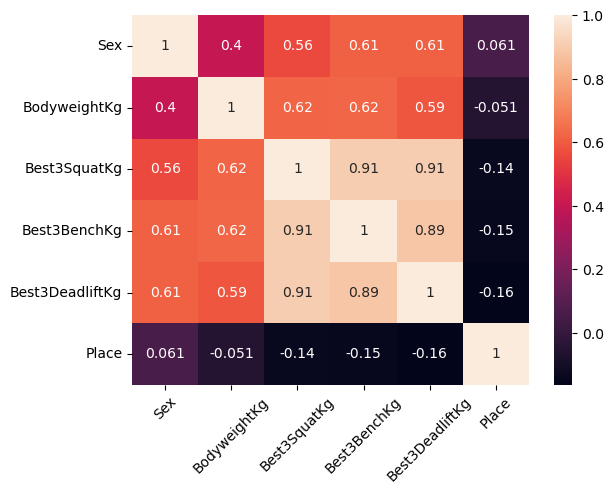

In [108]:
# Produce heatmap for variables
correlation = df_numerical.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
plt.xticks(rotation=45)
plt.show()

We also try one-hot encoding the `Equipment` column and checking its correlation with the lift weights:

In [65]:
one_hot_equipment = pd.get_dummies(df_filtered, columns=['Equipment'])

In [66]:
one_hot_equipment.head()

,Sex,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,Place,Sex_encoded,Equipment_encoded,Equipment_Multi-ply,Equipment_Raw,Equipment_Single-ply,Equipment_Wraps
0,F,59.8,105.0,55.0,130.0,4,0,3,False,False,False,True
1,F,58.5,120.0,67.5,145.0,2,0,3,False,False,False,True
2,F,60.0,105.0,72.5,132.5,3,0,3,False,False,False,True
3,F,104.0,140.0,80.0,170.0,3,0,3,False,False,False,True
4,F,74.0,142.5,82.5,145.0,5,0,3,False,False,False,True


In [67]:
one_hot_equipment = one_hot_equipment.drop(columns=['Sex','Equipment_encoded','Place','Sex_encoded'])

In [68]:
one_hot_equipment.head()

,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,Equipment_Multi-ply,Equipment_Raw,Equipment_Single-ply,Equipment_Wraps
0,59.8,105.0,55.0,130.0,False,False,False,True
1,58.5,120.0,67.5,145.0,False,False,False,True
2,60.0,105.0,72.5,132.5,False,False,False,True
3,104.0,140.0,80.0,170.0,False,False,False,True
4,74.0,142.5,82.5,145.0,False,False,False,True


In [86]:
one_hot_equipment = one_hot_equipment.rename(columns={'Equipment_Multi-ply': 'Multi-ply', 
                                                      'Equipment_Raw': 'Raw', 
                                                      'Equipment_Single-ply': 'Single-ply', 
                                                      'Equipment_Wraps': 'Wraps'})

In [87]:
one_hot_equipment.head()

,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,Multi-ply,Raw,Single-ply,Wraps
0,59.8,105.0,55.0,130.0,False,False,False,True
1,58.5,120.0,67.5,145.0,False,False,False,True
2,60.0,105.0,72.5,132.5,False,False,False,True
3,104.0,140.0,80.0,170.0,False,False,False,True
4,74.0,142.5,82.5,145.0,False,False,False,True


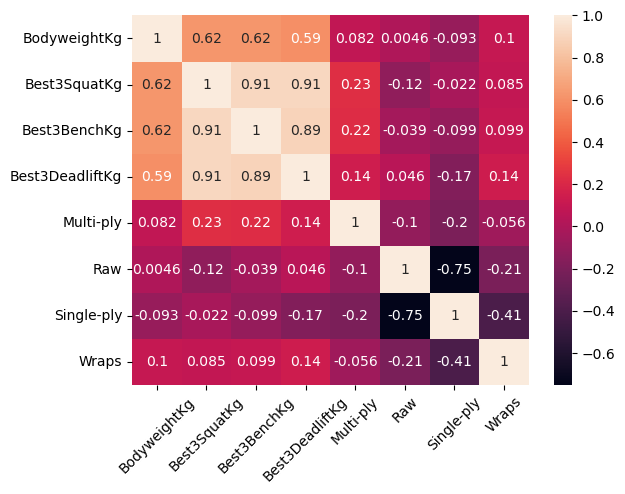

In [88]:
# new heatmap, this time with 'Equipment' one-hot encoded
correlation = one_hot_equipment.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
plt.xticks(rotation=45)
plt.show()